# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how="inner", on='Mouse ID')

# Display the data table for preview
display(merged_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse = merged_data['Mouse ID']
mouse_count = []
for i in mouse:
    if i not in mouse_count:
        mouse_count.append(i)
    else:
        next

print(len(mouse_count))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
display(duplicates)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = merged_data[merged_data["Mouse ID"] != 'g989']
display(cleaned)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = cleaned["Mouse ID"].unique()
mice_count = len(mice_count)
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                           "Median Tumor Volume": median,
                           "Tumor Volume Variance": var,
                           "Tumor Volume Std. Dev.": stddev,
                           "Tumor Volume Std. Err.": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = cleaned.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

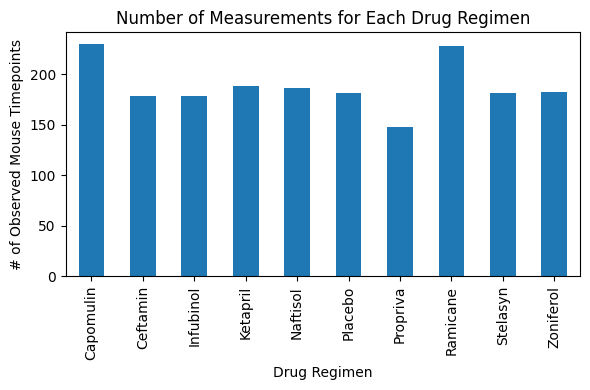

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_regimen = cleaned.groupby("Drug Regimen")["Timepoint"].count()
grouped_regimen.plot(kind='bar', figsize=(6, 4), legend = False)
plt.title('Number of Measurements for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

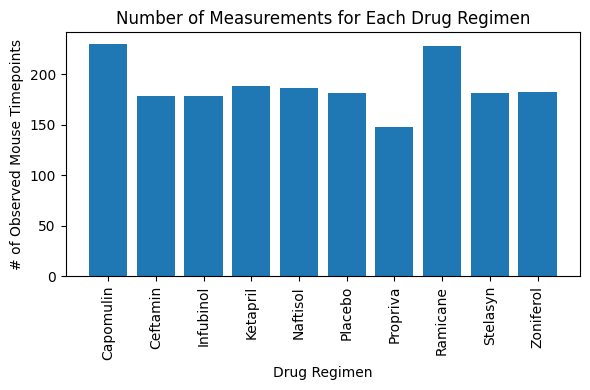

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped_regimen = cleaned.groupby("Drug Regimen")["Timepoint"].count()

regimen_names = grouped_regimen.index
regimen_counts = grouped_regimen.values

plt.figure(figsize=(6, 4))
plt.bar(regimen_names, regimen_counts)
plt.title('Number of Measurements for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

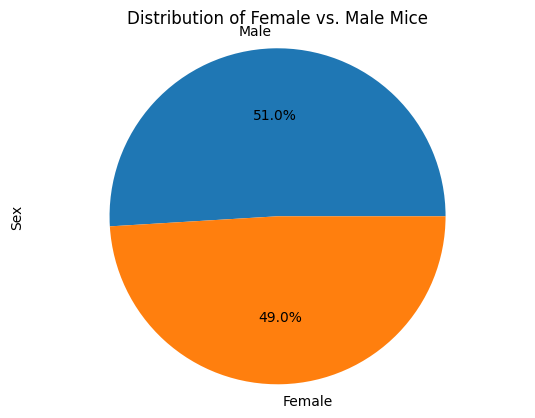

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = cleaned['Sex'].value_counts()

# Create a pie plot
gender_pie = gender.plot.pie(autopct='%0.1f%%', startangle=0)
gender_pie.set_ylabel('Sex')
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()

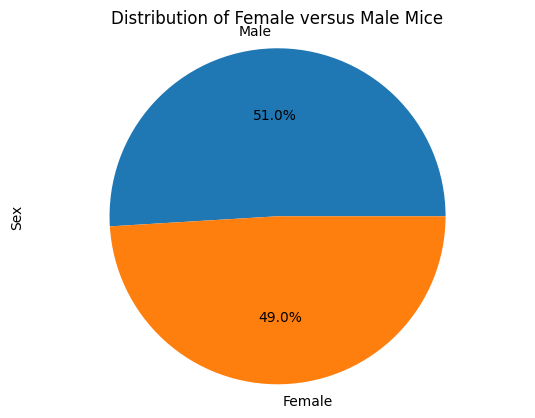

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=gender.index, autopct='%0.1f%%',)

plt.title("Distribution of Female versus Male Mice")
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finaltvol = cleaned.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = finaltvol.merge(cleaned, on=['Mouse ID', 'Timepoint'], how="left")
last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Created a dictionary to store potential outliers
potential_outliers_dict = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in selected_regimens:
    # Filters data for the current regimen
    regimen_data = last_timepoint[last_timepoint['Drug Regimen'] == i]
    
    # Sorts the data by timepoint and get the last tumor volume for each mouse
    last_volume = regimen_data.sort_values('Timepoint').groupby('Mouse ID')['Tumor Volume (mm3)'].last()
    
    # Appends the last tumor volume data to the list
    tumor_vol_data.append(last_volume)

    # Calculates quartiles
    quartiles = last_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    potential_outliers = last_volume[(last_volume < lower_bound) | (last_volume > upper_bound)]
    
    # Stores potential outliers in the dictionary
    potential_outliers_dict[i] = potential_outliers

# Prints the results for each regimen
for regimen, potential_outliers in potential_outliers_dict.items():
    if potential_outliers.empty:
        print(f"{regimen}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{regimen}'s potential outliers:")
        print(potential_outliers)



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


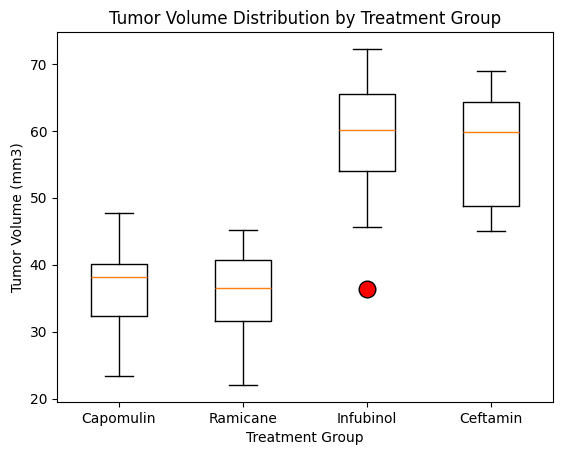

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=selected_regimens, flierprops={'markerfacecolor':'red', 'markersize':12})
plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

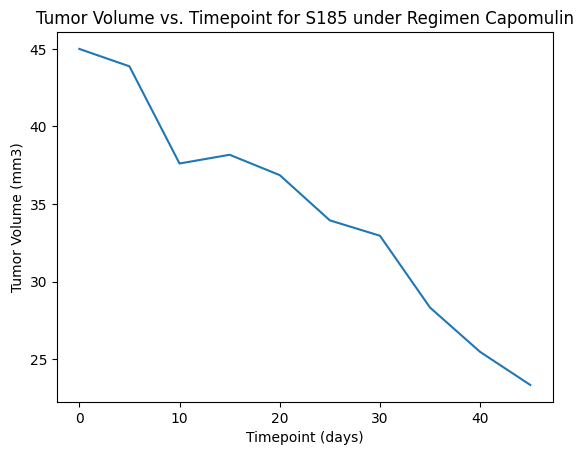

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for the specified mouse treated with Capomulin
capomulin = cleaned[cleaned['Drug Regimen'] == 'Capomulin']
mouse_id = 's185'
mouse_data = capomulin[capomulin['Mouse ID'] == mouse_id]
                    
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Timepoint for S185 under Regimen Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')                    
plt.show()              
                    

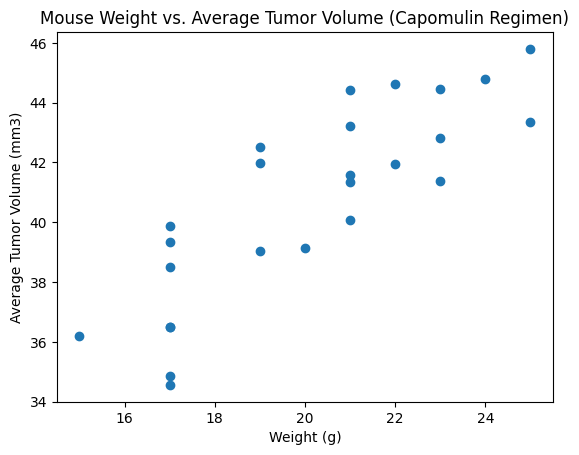

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculates the average tumor volume for each mouse
avg_tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Gets the corresponding weight for each mouse
mouse_weight = capomulin.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(mouse_weight, avg_tumor_volume)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


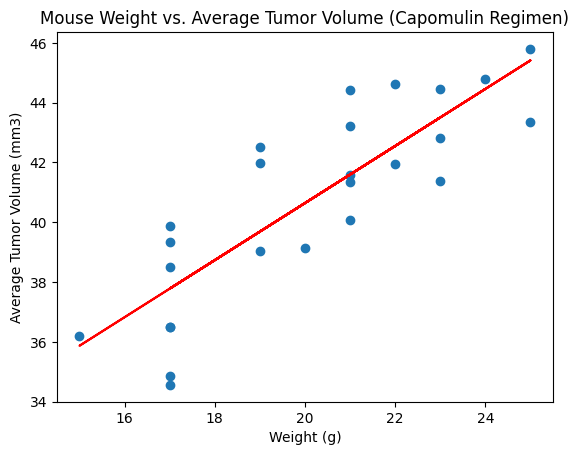

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Calculates the correlation coefficient
correlation = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Calculates the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

# Creates the regression line
regression_line = slope * mouse_weight + intercept

plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regression_line, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

